In [10]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import csv
import os, sys
import dill
import seaborn as sns
import sklearn as skl

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stemmer = SnowballStemmer('english')
stop_stems = dill.load(open("/Users/nknezek/Documents/Insight_local/project/data/wordlists/stop_words/stop_stems.m",'rb'))

In [11]:
folder = "/Users/nknezek/Documents/Insight_local/project/data/wordlists/SCOWL-custom/"
infilename = "words.txt"
cleanfilename = "cleanwords.txt"
stemfilename = "stems.txt"
cleanfile = open(folder+cleanfilename,'a')
stemfile = open(folder+stemfilename,'a')
stems = set()
with open(folder+infilename,'r') as infile:
    for l in infile:
        tokens = tokenizer.tokenize(l.lower())
        for token in tokens:
            if len(token) > 0 and len(token) < 20: # removes non words
                st = stemmer.stem(token)
                if st not in stems:
                    if (st not in stop_stems) and (len(st)>2):
                        stems.add(st)
                        cleanfile.write(st+','+l)
                        stemfile.write(st+'\n')                        
cleanfile.close()
stemfile.close()
print(stems)

{'monterrey', 'get', 'capellin', 'spherul', 'grogshop', 'troppo', 'folliculos', 'mailwoman', 'bolige', 'tass', 'frostbitten', 'disemploy', 'acetylsalicyl', 'bayberri', 'isoagglutin', 'staddl', 'milium', 'ferul', 'fraudsman', 'anatomist', 'flume', 'heterozygot', 'morular', 'deafish', 'ultrar', 'saim', 'smoketre', 'diazo', 'trackless', 'ultradens', 'courtlik', 'talc', 'melanoma', 'timberlin', 'cassegrainian', 'biodivers', 'nerol', 'nanook', 'begift', 'joukerypawkeri', 'hornersvill', 'lynnvill', 'wilhelmstrass', 'uncleless', 'furanos', 'antiantibodi', 'ardoch', 'prevar', 'david', 'motuca', 'vespertilionid', 'machinegun', 'humnok', 'pfeifer', 'glenaubrey', 'dipso', 'manward', 'ish', 'monosi', 'spokesmen', 'supersalesmen', 'skint', 'fothergilla', 'coachwork', 'asham', 'whereunto', 'chervonet', 'eleanor', 'marimbist', 'noncoit', 'stapedius', 'typhac', 'eyeshot', 'illyr', 'mountainsid', 'millennium', 'cycloplegia', 'agenesia', 'tiresom', 'encarpus', 'mulcib', 'handlebar', 'wrong', 'straighten

In [8]:
dill.dump(stems,open(folder+'vocab_stems.m','wb'))

# Describe stems

In [9]:
print(len(stems))

127028


In [33]:
lns = list(map(len,stems))

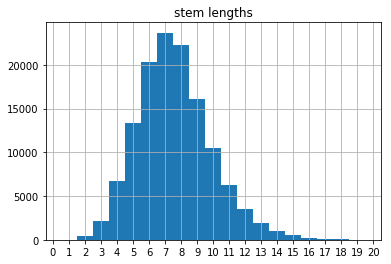

In [48]:
plt.hist(lns,bins=np.linspace(0.5,19.5,20))
plt.xticks(np.linspace(0,20,21))
plt.title("stem lengths")
plt.grid()
plt.savefig(folder+'stemlengths.pdf')